# Early Autism Detection

## Exploratory Data Analysis

### Load The Autistic Spectrum Disorder Screening Data for Children Dataset

**Description:** This dataset contains information related to the screening of autistic spectrum disorder (ASD) in children. It includes various demographic and behavioral features that are used to identify potential ASD cases.

**Attributes:**

- **A1_Score:** Integer - The answer code for the first question in the AQ-10-Child questionnaire (0 or 1).

- **A2_Score:** Integer - The answer code for the second question in the AQ-10-Child questionnaire (0 or 1).

- **A3_Score:** Integer - The answer code for the third question in the AQ-10-Child questionnaire (0 or 1).

- **A4_Score:** Integer - The answer code for the fourth question in the AQ-10-Child questionnaire (0 or 1).

- **A5_Score:** Integer - The answer code for the fifth question in the AQ-10-Child questionnaire (0 or 1).

- **A6_Score:** Integer - The answer code for the sixth question in the AQ-10-Child questionnaire (0 or 1).

- **A7_Score:** Integer - The answer code for the seventh question in the AQ-10-Child questionnaire (0 or 1).

- **A8_Score:** Integer - The answer code for the eighth question in the AQ-10-Child questionnaire (0 or 1).

- **A9_Score:** Integer - The answer code for the ninth question in the AQ-10-Child questionnaire (0 or 1).

- **A10_Score:** Integer - The answer code for the tenth question in the AQ-10-Child questionnaire (0 or 1).

- **age:** Integer - Age of the individual in years.

- **gender:** Categorical - Gender of the individual (Male or Female).

- **ethnicity:** Categorical - List of common ethnicities in text format.

- **jaundice:** Binary - Whether the individual was born with jaundice (yes or no).

- **autism:** Binary - Whether any immediate family member has a pervasive developmental disorder (PDD) (yes or no).

- **country_of_res:** Categorical - List of countries in text format.

- **used_app_before:** Binary - Whether the user has used a screening app before (yes or no).

- **result:** Integer - The final score obtained based on the scoring algorithm of the screening method used.

- **age_desc:** Categorical - Description of the age category.

- **relation:** Categorical - The person completing the test (Parent, self, caregiver, medical staff, clinician, etc.).

- **class:** Binary - The target variable indicating whether the individual is classified as having ASD (yes or no).

**Source:** Thabtah, F. (2017). Autistic Spectrum Disorder Screening Data for Children [Dataset]. UCI Machine Learning Repository. Retrieved from https://doi.org/10.24432/C5659W.


In [1]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from ucimlrepo import fetch_ucirepo 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import squarify

In [2]:
autistic_spectrum_disorder_screening_data_for_children = fetch_ucirepo( id=419 ) 
X = autistic_spectrum_disorder_screening_data_for_children.data.features 
y = autistic_spectrum_disorder_screening_data_for_children.data.targets 
df_original = pd.concat( [X, y], axis=1 )
df = df_original.copy()

## Dataset Inspection

The dataset has **292** records and **21** features (variables).

In [3]:
feature_names = df.columns
print( feature_names )
print( df.shape )

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'class'],
      dtype='object')
(292, 21)


### Data Types and Data Head and Tail

In [4]:
print( df.dtypes )

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
autism              object
country_of_res      object
used_app_before     object
result               int64
age_desc            object
relation            object
class               object
dtype: object


In [5]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [6]:
df.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,class
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,'United Kingdom',no,10,'4-11 years',Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,4,'4-11 years',Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,7,'4-11 years',Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,'South Asian',no,no,India,no,9,'4-11 years',Parent,YES
291,0,0,1,0,1,0,1,0,0,0,...,f,'South Asian',no,no,India,no,3,'4-11 years',Parent,NO


### Missing Values

The columns with missing values are **ethnicity** with **43** missing values, **relation** with **43** missing values, and **age** with **4** missing values.

In [7]:
df.isna().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jaundice            0
autism              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           43
class               0
dtype: int64

### Duplicates

There are 2 duplicates but they have different values in different columns so I'll keep them.

In [8]:
duplicates = df.duplicated()
print( df[duplicates] )

    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
84         0         0         1         0         1         1         1   
93         0         0         1         1         1         1         1   

    A8_Score  A9_Score  A10_Score  ...  gender ethnicity jaundice autism  \
84         0         1          1  ...       m     Asian       no     no   
93         1         1          1  ...       m     Asian       no     no   

   country_of_res used_app_before result      age_desc relation class  
84          India              no      6  '4-11 years'   Parent    NO  
93          India              no      8  '4-11 years'   Parent   YES  

[2 rows x 21 columns]


### Outliers

There's **1 outlier** in the **result** column and this is because the **result** column is obtained by adding the **first ten** columns. The value for these first ten columns is 0 and therefore the value for the **result** column is 0. I'll ignore this outlier since it is a valid record.

In [9]:
def detect_outliers_iqr( df, column ):
    Q1 = df[column].quantile( 0.25 )
    Q3 = df[column].quantile( 0.75 )
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    outliers = df[( df[column] < lower_bound ) | ( df[column] > upper_bound )]
    
    return outliers

numerical_features = df.select_dtypes( include=['number'] ).columns

for feature in numerical_features:
    outliers = detect_outliers_iqr( df, feature )
    print( f"Number of outliers in {feature}: {len( outliers )}" )
    if not outliers.empty:
        print( outliers )

Number of outliers in A1_Score: 0
Number of outliers in A2_Score: 0
Number of outliers in A3_Score: 0
Number of outliers in A4_Score: 0
Number of outliers in A5_Score: 0
Number of outliers in A6_Score: 0
Number of outliers in A7_Score: 0
Number of outliers in A8_Score: 0
Number of outliers in A9_Score: 0
Number of outliers in A10_Score: 0
Number of outliers in age: 0
Number of outliers in result: 1
     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
137         0         0         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score  ...  gender ethnicity jaundice autism  \
137         0         0          0  ...       f  Hispanic       no     no   

      country_of_res used_app_before result      age_desc relation class  
137  'United States'              no      0  '4-11 years'   Parent    NO  

[1 rows x 21 columns]


In [10]:
for feature in numerical_features:
    outliers = detect_outliers_iqr( df, feature )
    print( f"Number of outliers in {feature}: {len( outliers )}" )
    if not outliers.empty:
        print( f"Outliers in {feature}:" )
        print( outliers[['result']] )

Number of outliers in A1_Score: 0
Number of outliers in A2_Score: 0
Number of outliers in A3_Score: 0
Number of outliers in A4_Score: 0
Number of outliers in A5_Score: 0
Number of outliers in A6_Score: 0
Number of outliers in A7_Score: 0
Number of outliers in A8_Score: 0
Number of outliers in A9_Score: 0
Number of outliers in A10_Score: 0
Number of outliers in age: 0
Number of outliers in result: 1
Outliers in result:
     result
137       0


### Data Imbalance

The dataset is relatively balanced with a slight majority of **NO** instances. No concern for data imbalance.

In [11]:
class_distribution = df['class'].value_counts()

print( "Class distribution:" )
print( class_distribution )

class_percentage = df['class'].value_counts( normalize = True ) * 100

print( "\nClass percentage distribution:" )
for index, value in class_percentage.items():
    print( f"{index}: {value:.2f}%" )

Class distribution:
class
NO     151
YES    141
Name: count, dtype: int64

Class percentage distribution:
NO: 51.71%
YES: 48.29%


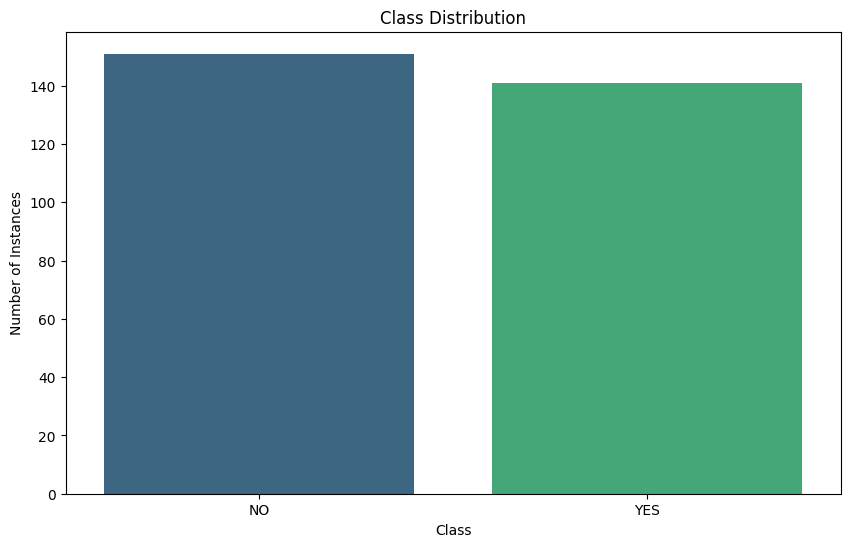

In [12]:
class_distribution_df = class_distribution.reset_index()
class_distribution_df.columns = ['class', 'count']

plt.figure( figsize = ( 10, 6 ) )
sns.barplot( data = class_distribution_df, x = 'class', y = 'count', palette = 'viridis', hue = 'class', dodge = False )
plt.title( 'Class Distribution' )
plt.xlabel( 'Class' )
plt.ylabel( 'Number of Instances' )
plt.legend( [],[], frameon = False )
plt.show()

## Data Cleaning

### Imputing missing values for "ethnicity" and "relation" with "Unknown" 

In [13]:
df.fillna( {"ethnicity": "Unknown"}, inplace = True )
df.fillna( {"relation": "Unknown"}, inplace = True )

### Deleting result and age_desc column

In [14]:
df = df.drop( columns = ["result", "age_desc"] )

### Imputing missing values for age by median

In [15]:

simple_imputer = SimpleImputer( strategy = 'median' )
df['age'] = simple_imputer.fit_transform( df[['age']] )

### Converting categorical columns to category data type

In [16]:
categorical_columns = ['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before', 'relation', 'class']
for col in categorical_columns:
    df[col] = df[col].astype( 'category' )

## Data Preprocessing

### Unique Values for Categorical columns

In [17]:
categorical_columns = df.select_dtypes( include = ['object', 'category'] ).columns

for col in categorical_columns:
    unique_values = df[col].unique()
    print( f"Unique values in '{col}': {unique_values}" )

Unique values in 'gender': ['m', 'f']
Categories (2, object): ['f', 'm']
Unique values in 'ethnicity': ['Others', ''Middle Eastern '', 'Unknown', 'White-European', 'Black', ..., 'Asian', 'Pasifika', 'Hispanic', 'Turkish', 'Latino']
Length: 11
Categories (11, object): [''Middle Eastern '', ''South Asian'', 'Asian', 'Black', ..., 'Pasifika', 'Turkish', 'Unknown', 'White-European']
Unique values in 'jaundice': ['no', 'yes']
Categories (2, object): ['no', 'yes']
Unique values in 'autism': ['no', 'yes']
Categories (2, object): ['no', 'yes']
Unique values in 'country_of_res': ['Jordan', ''United States'', 'Egypt', ''United Kingdom'', 'Bahrain', ..., 'Mexico', ''Isle of Man'', 'Libya', 'Ghana', 'Bhutan']
Length: 52
Categories (52, object): [''Costa Rica'', ''Isle of Man'', ''New Zealand'', ''Saudi Arabia'', ..., 'Russia', 'Sweden', 'Syria', 'Turkey']
Unique values in 'used_app_before': ['no', 'yes']
Categories (2, object): ['no', 'yes']
Unique values in 'relation': ['Parent', 'Unknown', 'Self

### Clean the ethnicity, country_of_res column, and relation

In [18]:
def clean_columns( df, columns ):
  
    for col in columns:
        df[col] = df[col].str.strip()
        df[col] = df[col].str.replace(r'[^a-zA-Z\s-]', '', regex=True)
    return df

columns_to_clean = ['ethnicity', 'country_of_res', 'relation']
df = clean_columns( df, columns_to_clean )

df['relation'] = df['relation'].replace( {'self': 'Self', 'Self': 'Self'} )

### Label Encoding and One-hot encoding Categorical Columns

In [19]:
label_encode_columns = ["gender", "jaundice", "autism", "used_app_before", "class"]
label_encoders = {}
for col in label_encode_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform( df[col] )
    label_encoders[col] = le

one_hot_encoded_columns = ["ethnicity", "country_of_res", "relation"]
df = pd.get_dummies( df, columns = one_hot_encoded_columns )

### MinMax Scaling

In [20]:
numerical_columns = df.select_dtypes( include = ['number'] ).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform( df[numerical_columns] )

### Saving dataframe to CSV for future analysis

In [21]:
df.to_csv( 'early_autism.csv', index = False )

## Data Analysis And Visualization

### Summary Statistics

In [22]:
print( df.describe() )

         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  292.000000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     0.633562    0.534247    0.743151    0.551370    0.743151    0.712329   
std      0.482658    0.499682    0.437646    0.498208    0.437646    0.453454   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age      gender  \
count  292.000000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     0.606164    0.496575    0.493151    0.726027    0.335616    0.712329   
std      0.489438    0.5008

### Distribution of the target variable

The **NO** class has a bit higher count than the **YES** class but ultimately the two are relatively balanced. 

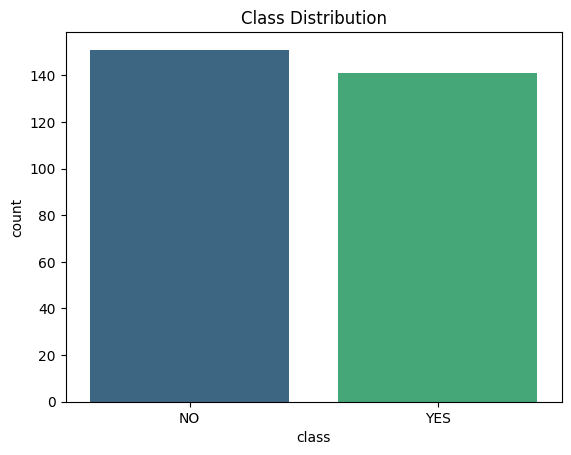

In [23]:
sns.countplot( x = 'class', data = df_original, hue = 'class', palette = 'viridis' )
plt.title( 'Class Distribution' )
plt.show()

### Distibution for Numerical Features

**age** has right skewed distribution whereas **result** has left skewed distribution.

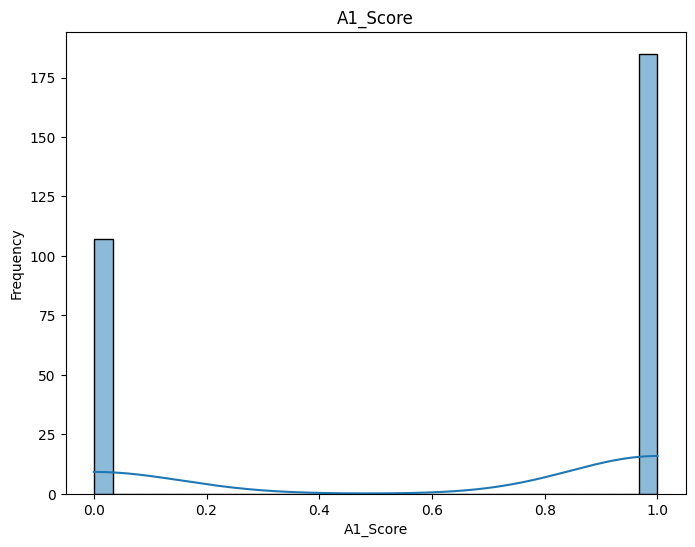

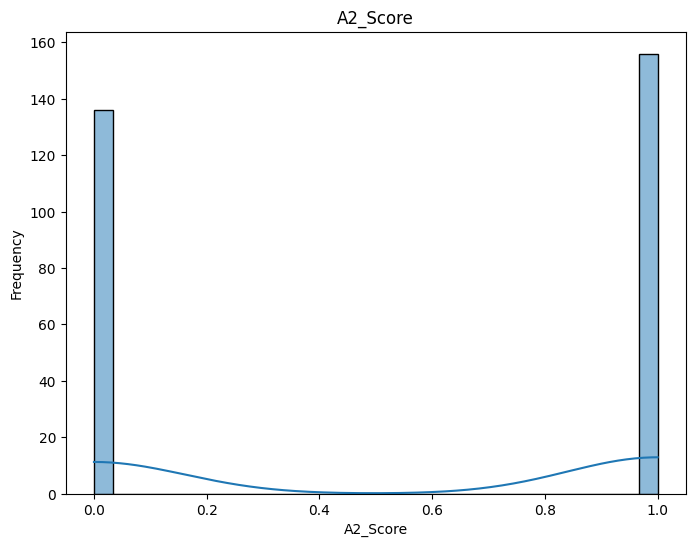

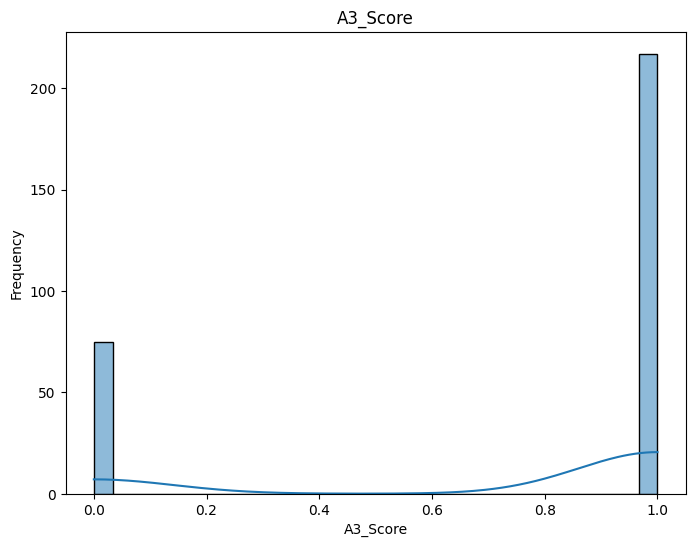

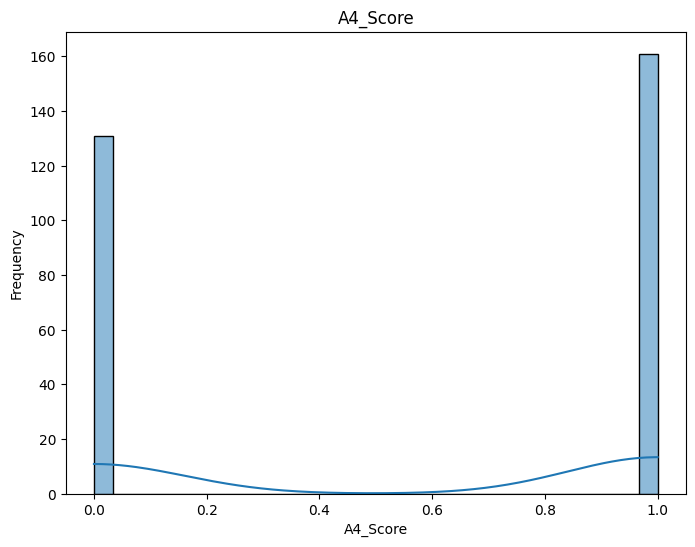

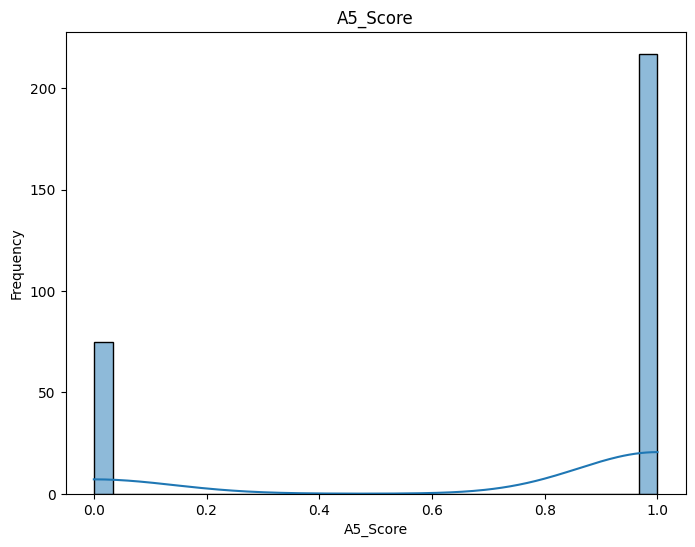

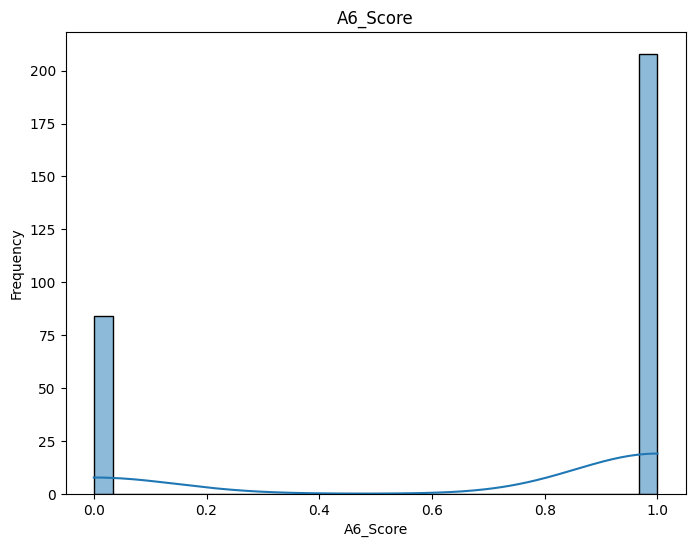

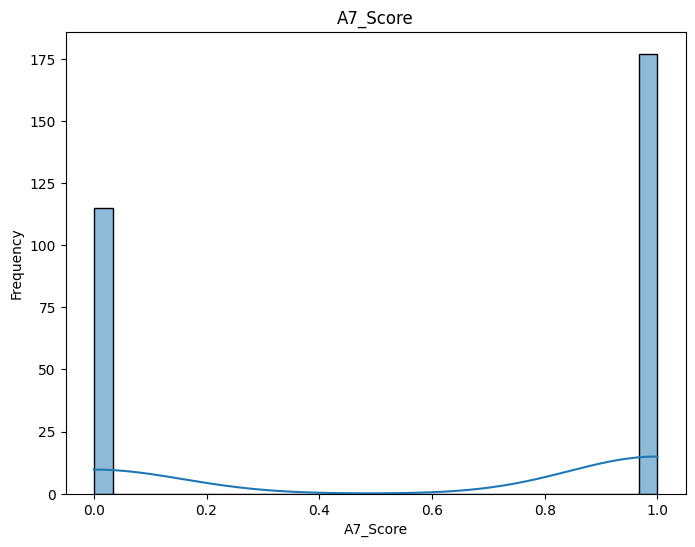

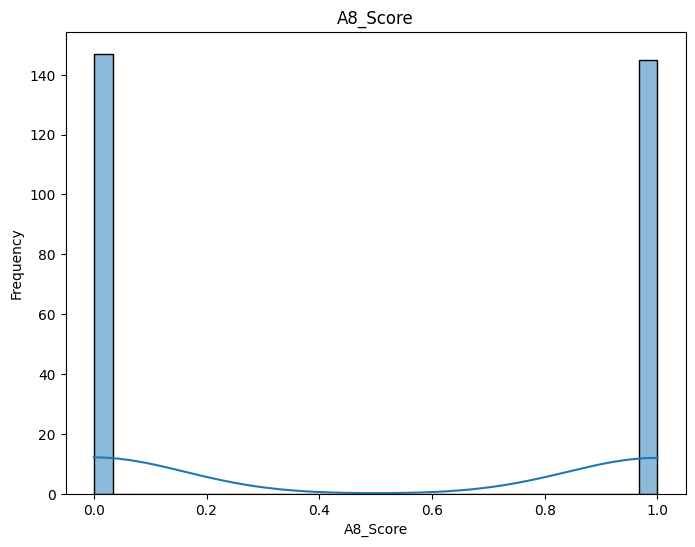

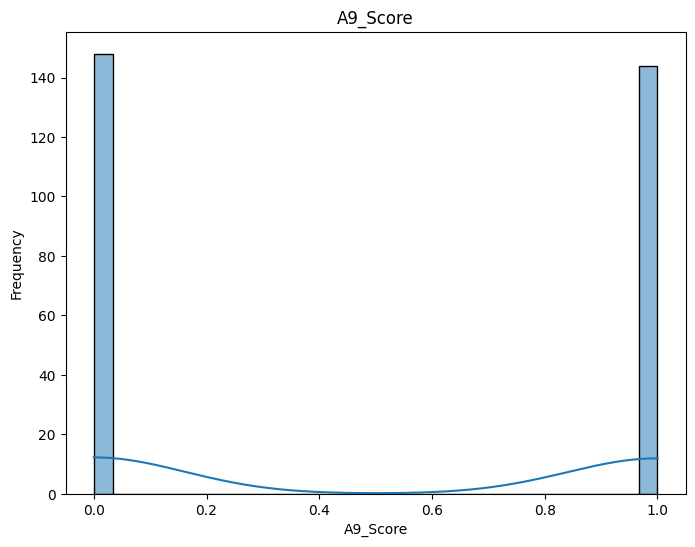

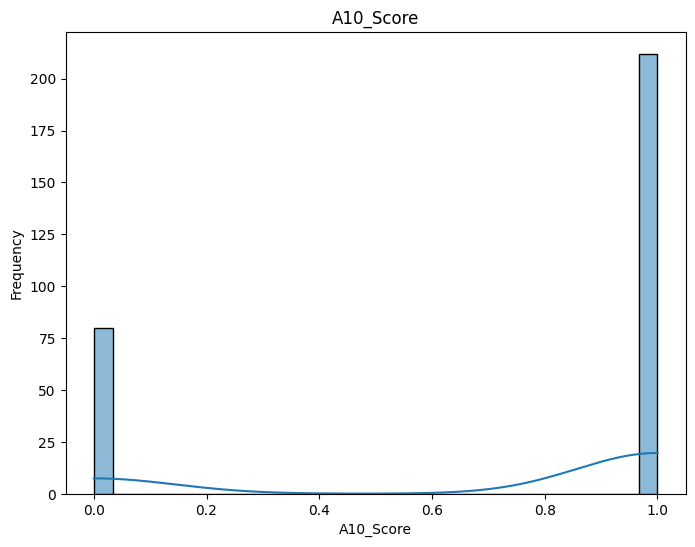

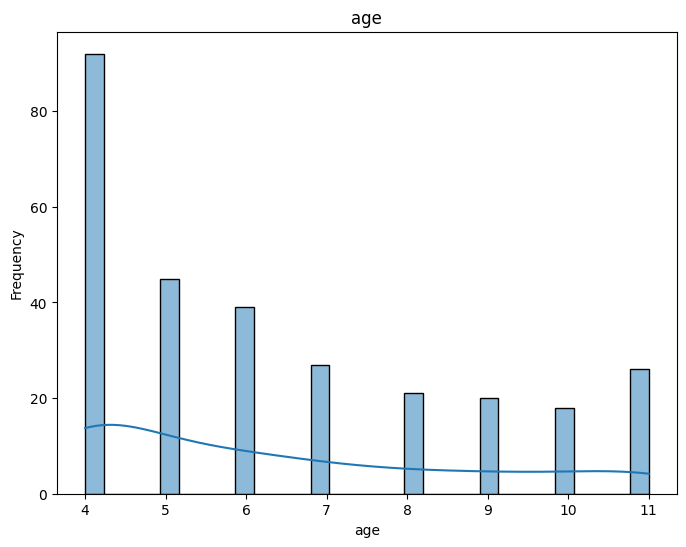

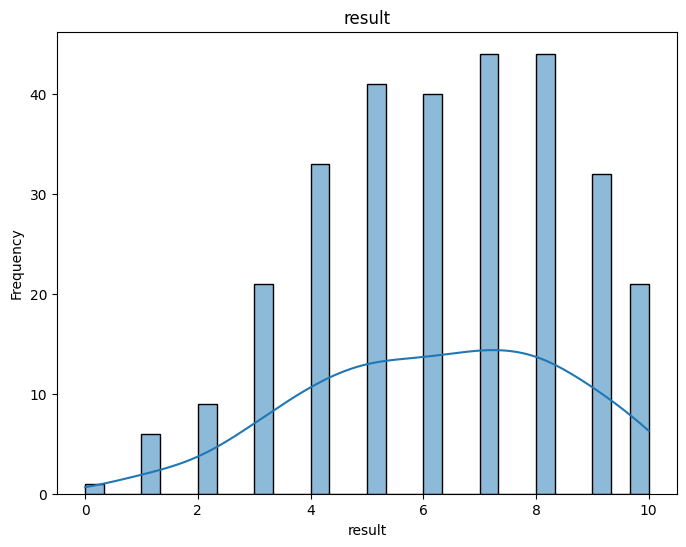

In [24]:
numerical_columns = df_original.select_dtypes( include = ['number']).columns

for col in numerical_columns:
    plt.figure( figsize = (8, 6))
    sns.histplot( df_original[col], kde = True, bins = 30 )
    plt.title( f'{col}' )
    plt.xlabel( col )
    plt.ylabel( 'Frequency' )
    plt.show()

### Distribution for age and result features

- The **age** is centered around 6 years old.
- One outlier is observed for **result** feature and the result column is centered around 6 as the total score after answering the 10 questions. 

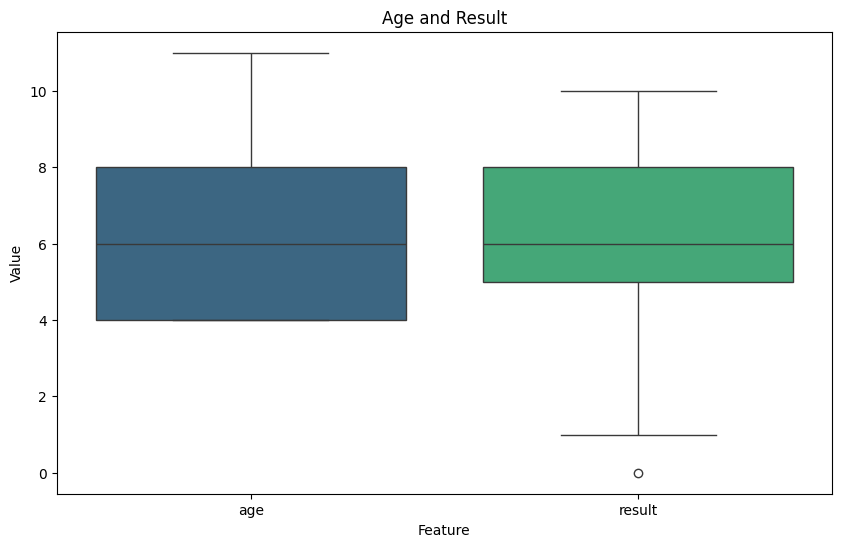

In [25]:
columns_to_plot = ['age', 'result']
df_melted = df_original[columns_to_plot].melt( var_name = 'Feature', value_name = 'Value' ) 

plt.figure( figsize = ( 10, 6 ) )
sns.boxplot( x = 'Feature', y = 'Value', data = df_melted, hue = 'Feature', palette = 'viridis', dodge = False )
plt.title( 'Age and Result')
plt.xlabel( 'Feature' )
plt.ylabel( 'Value' )
plt.legend( [],[], frameon = False )
plt.show()

### Gender and Class

- In the dataset we find slightly more **female** kids without autism than non autistic female kids.
- **Male** kids with autism are almost the same as those without autism.

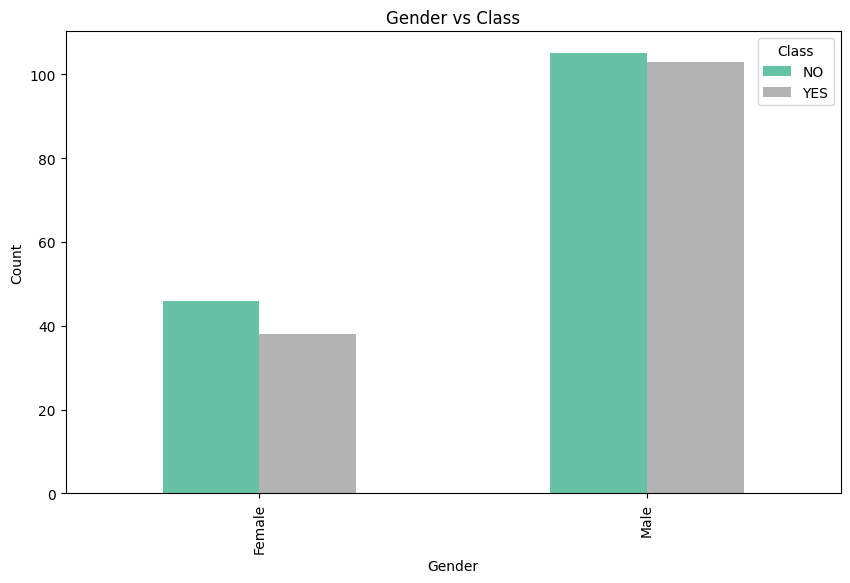

In [26]:
df_original['gender'] = df_original['gender'].replace( {'m': 'Male', 'f': 'Female'} )

cross_tab = pd.crosstab( df_original['gender'], df_original['class'] )
cross_tab.plot( kind = 'bar', figsize = ( 10, 6 ), colormap = 'Set2' )
plt.title( 'Gender vs Class' )
plt.xlabel('Gender' )
plt.ylabel( 'Count' )
plt.legend( title = 'Class' )
plt.show()

### Ethnicity Distribution

Most of the kids in the dataset are **White-European** followed by **Asian**, **Middle Eastern**, **South Asian**, and **Black**.

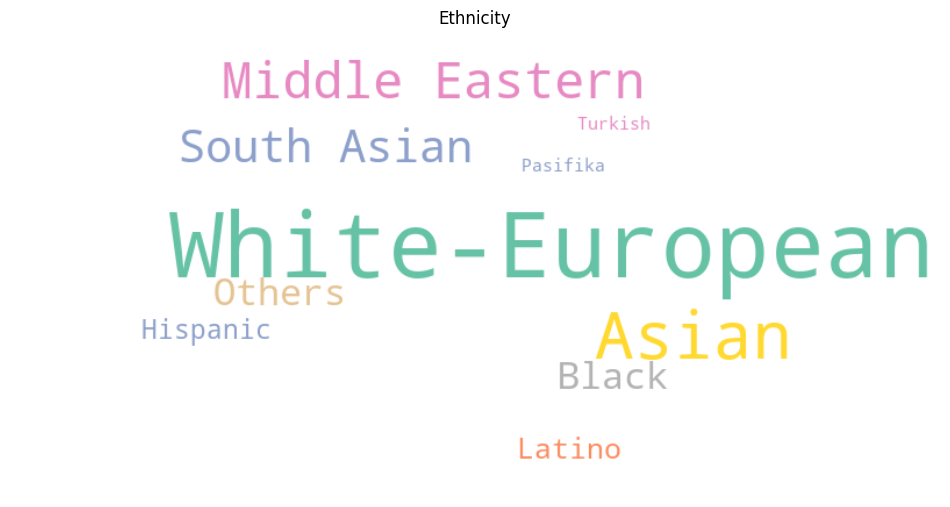

In [27]:
df_original = clean_columns( df_original, columns_to_clean )
ethnicity_counts = df_original['ethnicity'].value_counts()

wordcloud = WordCloud( width = 800, height = 400, background_color = 'white', colormap = 'Set2' ).generate_from_frequencies( ethnicity_counts )

plt.figure( figsize = ( 12, 8))
plt.imshow( wordcloud, interpolation = 'bilinear' )
plt.title( 'Ethnicity' )
plt.axis( 'off' )
plt.show()

### Relation by Class

- The relation is the person who completed the test.
- For the **parent** category, the number of the autistic kids whom they completed the tests for is fairly higher than for the kids without autism.
- For the **relative** category, the number of the autistic kids who they completed the tests for is significantly lower than for the kids without autism.
- For the rest of the categories, the numbers are fairly close.

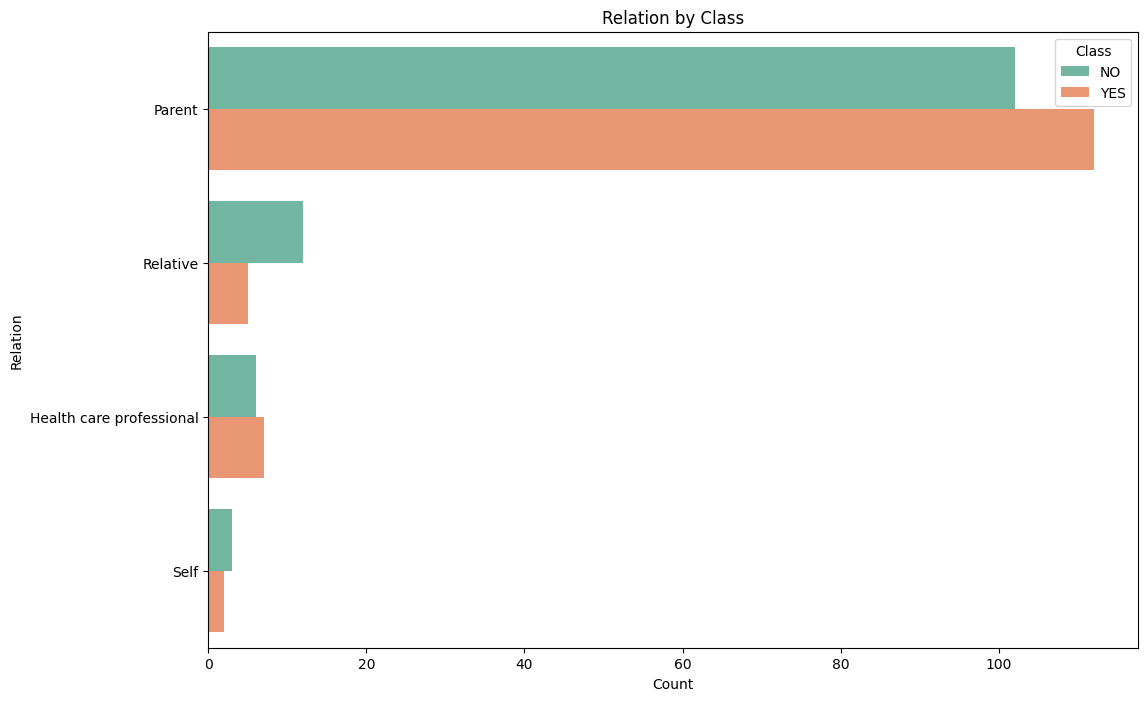

In [28]:
df_original['relation'] = df_original['relation'].replace( {'self': 'Self', 'Self': 'Self'} )

plt.figure( figsize = ( 12, 8 ) )
sns.countplot( y = 'relation', data = df_original, palette = 'Set2', hue = 'class', order = df_original['relation'].value_counts().index )
plt.title( 'Relation by Class' )
plt.xlabel( 'Count' )
plt.ylabel( 'Relation' )
plt.legend( title='Class' )
plt.show()

### Top 15 Countries of Residence

Most kids in the dataset are from **United Kingdom** and **India** followed by **United States**, **Australia**, **Jordan**, and **New Zealand**.

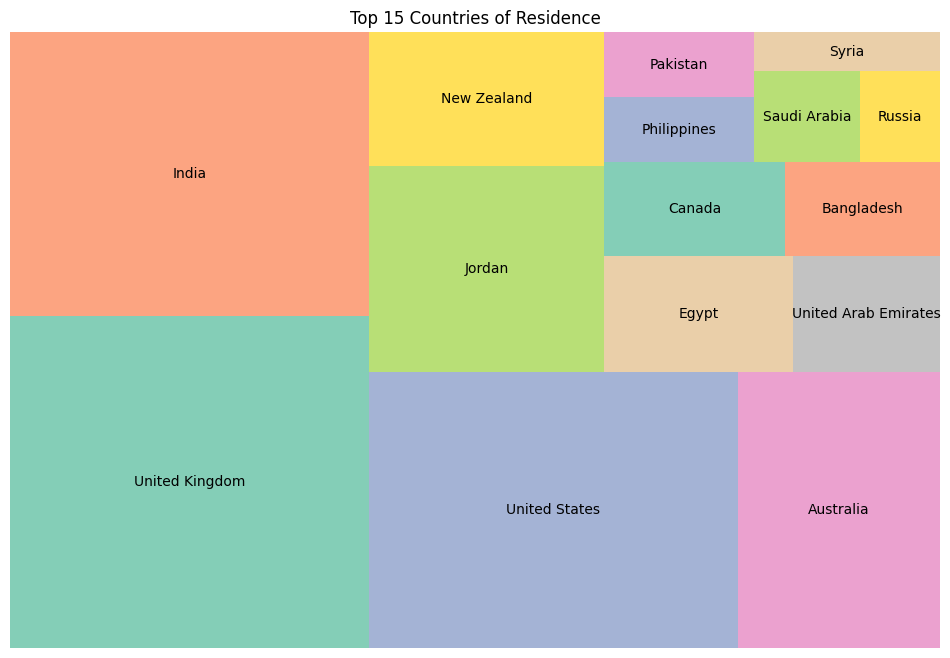

In [29]:
top_15_countries = df_original['country_of_res'].value_counts().nlargest( 15 )

plt.figure( figsize = ( 12, 8 ) )
squarify.plot( sizes = top_15_countries.values, label = top_15_countries.index, alpha = 0.8, color = sns.color_palette( 'Set2', len( top_15_countries  ) ) )
plt.title( 'Top 15 Countries of Residence' )
plt.axis( 'off' )
plt.show()

### Comparing jaundice, autism, and used_app_before versus class

- Most of the kids in the dataset do not have **jaundice** but there's no clear relationship between jaundice and having or not having autism. 

- **autism** column shows whether any immediate family member has a pervasive developmental disorder (PDD) (yes or no) and most kids in the dataset in the dataset do not have PDD. Also there's no clear relationship between PDD and having or not having autism. 

- **used_app_before** column means whether the user has used a screening app before (yes or no) and most kids in the dataset do not. Also there's no clear relationship between using having a screening app before and having or not having autism. 

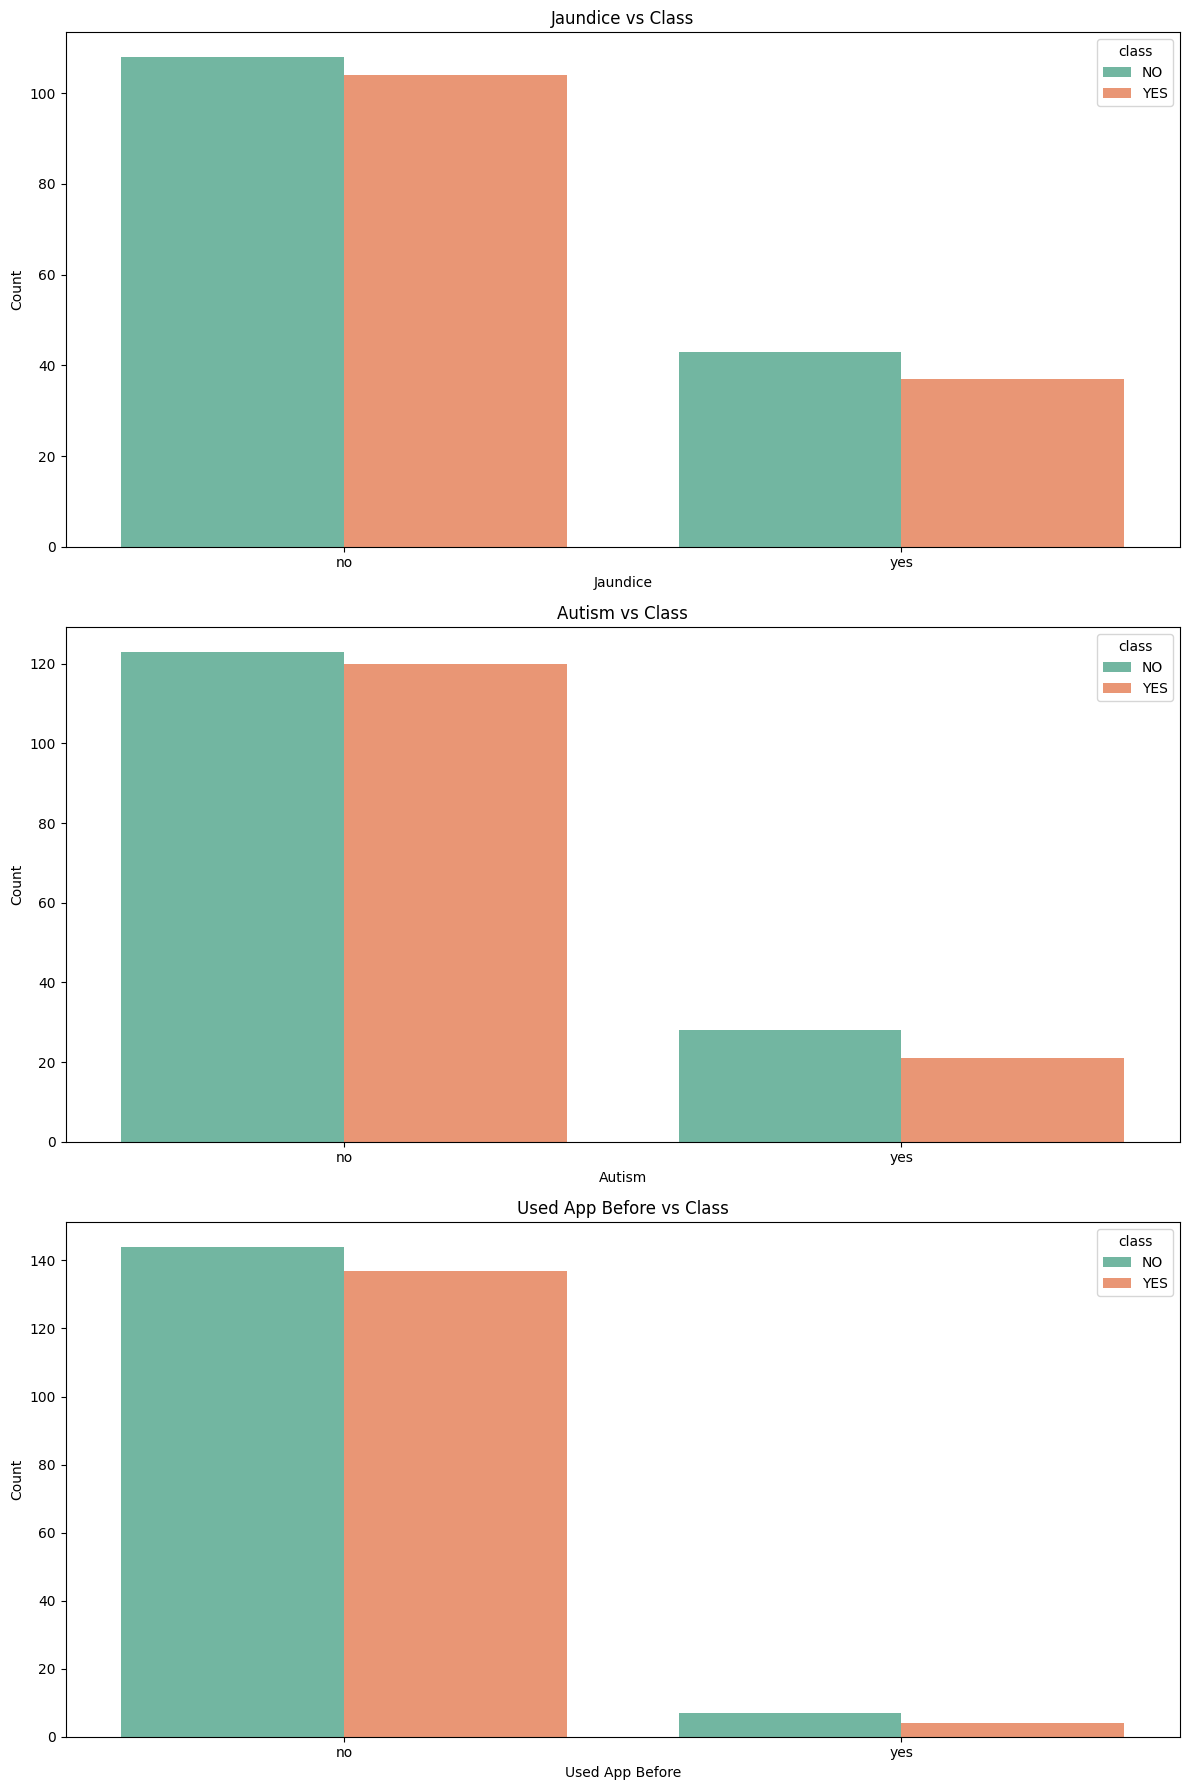

In [30]:
fig, axes = plt.subplots( 3, 1, figsize = ( 12, 18 ) )

sns.countplot( x = 'jaundice', hue = 'class', data = df_original, palette = 'Set2', ax = axes[0] )
axes[0].set_title( 'Jaundice vs Class' )
axes[0].set_xlabel( 'Jaundice' )
axes[0].set_ylabel( 'Count' )

sns.countplot(x = 'autism', hue = 'class', data = df_original, palette ='Set2', ax = axes[1] )
axes[1].set_title( 'Autism vs Class' )
axes[1].set_xlabel( 'Autism' )
axes[1].set_ylabel( 'Count' )

sns.countplot( x = 'used_app_before', hue = 'class', data = df_original, palette = 'Set2', ax = axes[2] )
axes[2].set_title( 'Used App Before vs Class' )
axes[2].set_xlabel( 'Used App Before' )
axes[2].set_ylabel( 'Count' )

plt.tight_layout()
plt.show()

### PCA and K-Means Clustering

- **PCA** is utilized here to reduce the dataset to **2** principal components, followed by **K-Means** clustering
- The dataset shows **4** clusters that the dataset can be divided into.

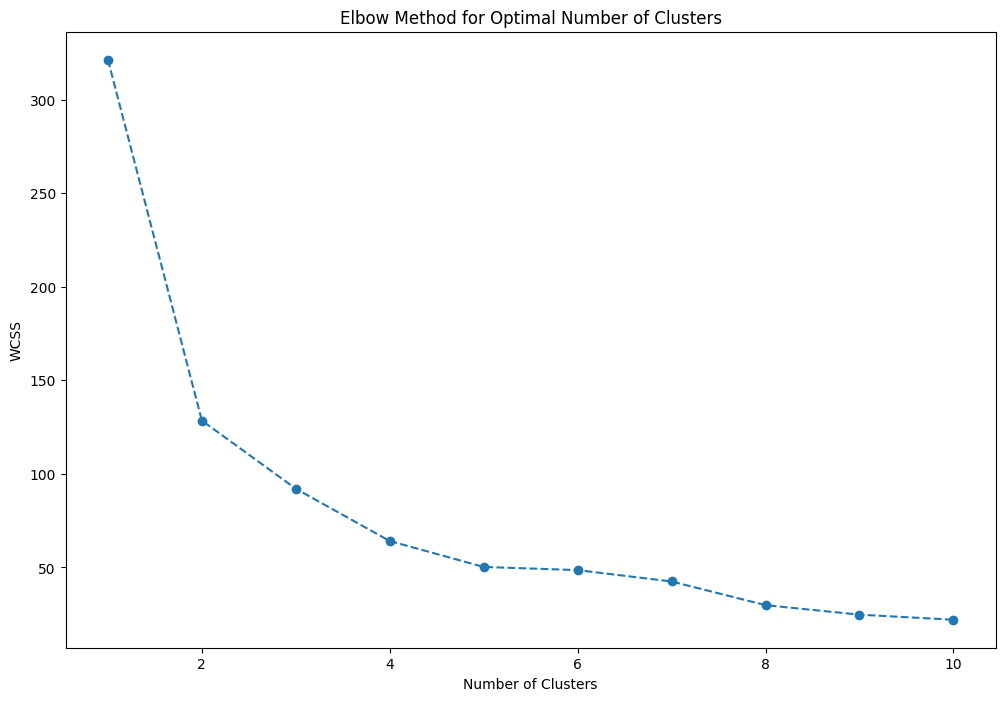

In [31]:
numerical_imputer = SimpleImputer( strategy = 'median' )
df_original[df_original.select_dtypes( include = ['number'] ).columns] = numerical_imputer.fit_transform( df_original.select_dtypes( include = ['number'] ) )

df_original[df_original.select_dtypes( include = ['object', 'category']).columns] = df_original.select_dtypes( include = ['object', 'category'] ).fillna( 'Unknown' )

label_encoders = {}
for column in df_original.select_dtypes( include = ['object', 'category'] ).columns:
    le = LabelEncoder()
    df_original[column] = le.fit_transform( df_original[column] )
    label_encoders[column] = le

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform( df_original )

pca = PCA( n_components = 2 )
pca_data = pca.fit_transform( scaled_data )

wcss = []
for i in range( 1, 11 ):
    kmeans = KMeans( n_clusters = i, random_state = 42 )
    kmeans.fit( pca_data )
    wcss.append( kmeans.inertia_ )

plt.figure( figsize = ( 12, 8 ) )
plt.plot( range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title( 'Elbow Method for Optimal Number of Clusters' )
plt.xlabel( 'Number of Clusters' )
plt.ylabel( 'WCSS' )
plt.show()

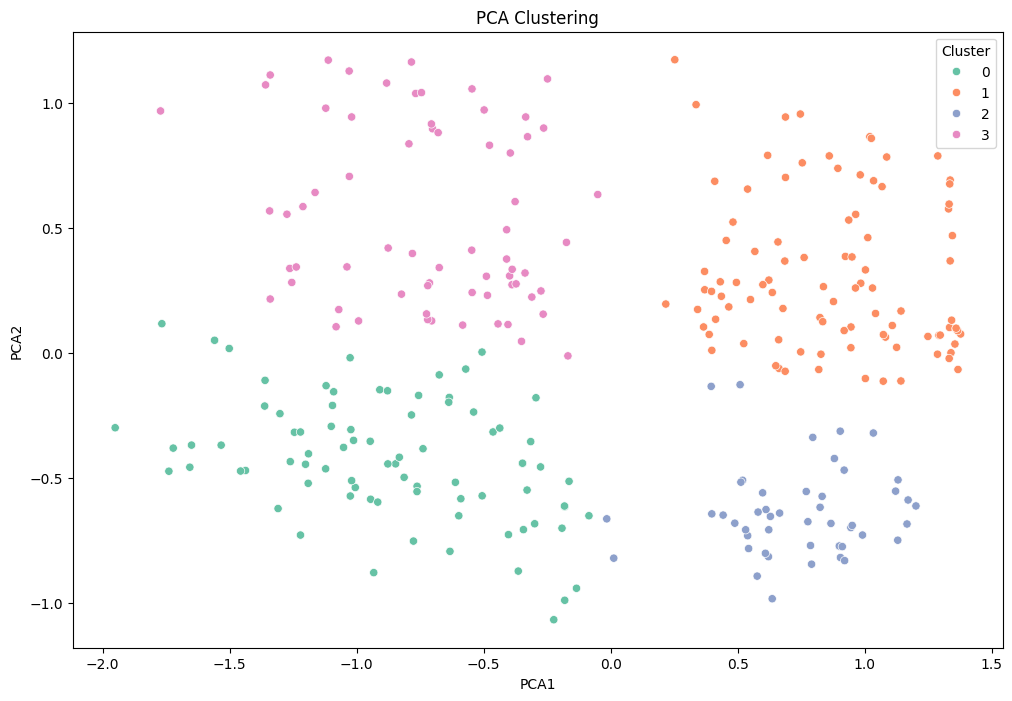

In [32]:
kmeans = KMeans( n_clusters = 4, random_state = 42 )
clusters = kmeans.fit_predict( pca_data )

df_pca = pd.DataFrame( pca_data, columns = ['PCA1', 'PCA2'] )
df_pca['Cluster'] = clusters

plt.figure( figsize = ( 12, 8 ) )
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster', palette = 'Set2', data = df_pca )
plt.title( 'PCA Clustering' )
plt.xlabel( 'PCA1' )
plt.ylabel( 'PCA2' )
plt.legend( title = 'Cluster' )
plt.show()